In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
import tensorflow as tf
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report, confusion_matrix

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

import glob

In [3]:
main_path = '/content/gdrive/MyDrive/Aruna Gawde Maam Research Paper/Alzheimers-ADNI'

In [4]:

train_path = os.path.join(main_path, "train")
test = os.path.join(main_path, "test")

In [5]:
final_ad_train_images = glob.glob(train_path + "/Final AD JPEG/*.jpg")
final_cn_train_images = glob.glob(train_path + "/Final CN JPEG/*.jpg")
final_emci_train_images = glob.glob(train_path + "/Final EMCI JPEG/*.jpg")
final_lmci_train_images = glob.glob(train_path + "/Final LMCI JPEG/*.jpg")
final_mci_train_images = glob.glob(train_path + "/Final MCI JPEG/*.jpg")

In [6]:
print(len(final_ad_train_images))
print(len(final_cn_train_images))
print(len(final_emci_train_images))
print(len(final_lmci_train_images))
print(len(final_mci_train_images))

145
493
204
61
198


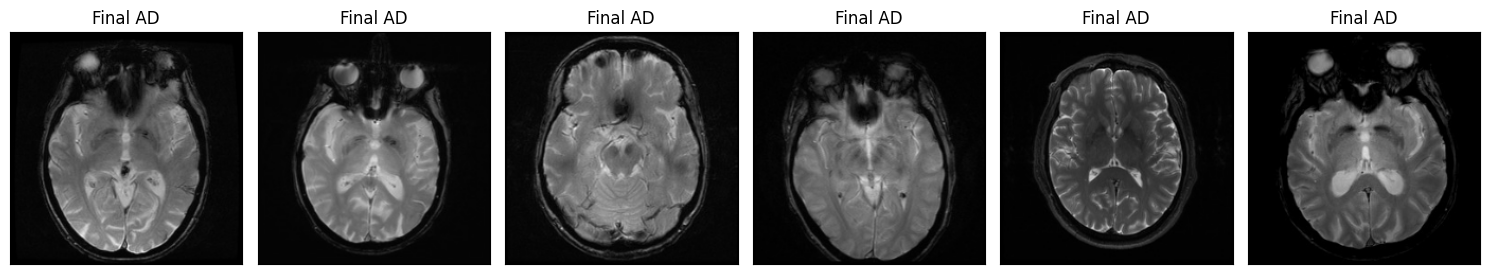

In [7]:
fig, axes = plt.subplots(nrows = 1, ncols = 6, figsize = (15, 10), subplot_kw = {'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    img = cv2.imread(final_ad_train_images[i])
    img = cv2.resize(img, (220, 220))
    ax.imshow(img)
    ax.set_title("Final AD")
fig.tight_layout()    

plt.show()

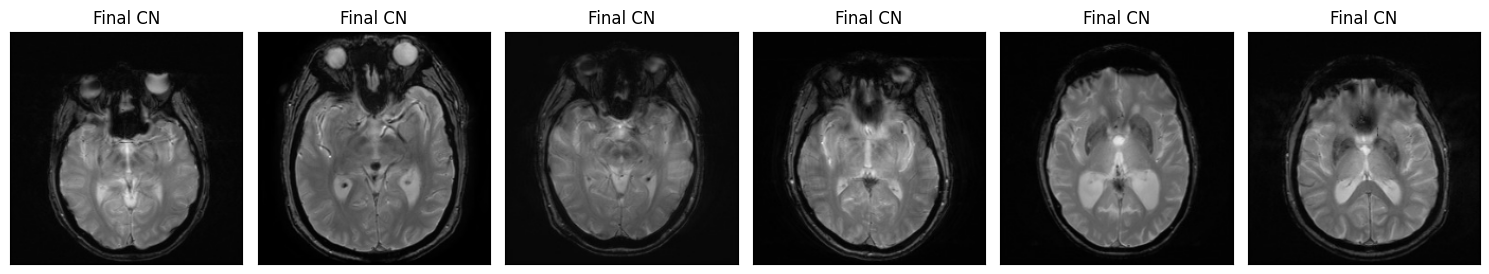

In [8]:
fig, axes = plt.subplots(nrows = 1, ncols = 6, figsize = (15, 10), subplot_kw = {'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    img = cv2.imread(final_cn_train_images[i])
    img = cv2.resize(img, (220, 220))
    ax.imshow(img)
    ax.set_title("Final CN")
fig.tight_layout()    

plt.show()

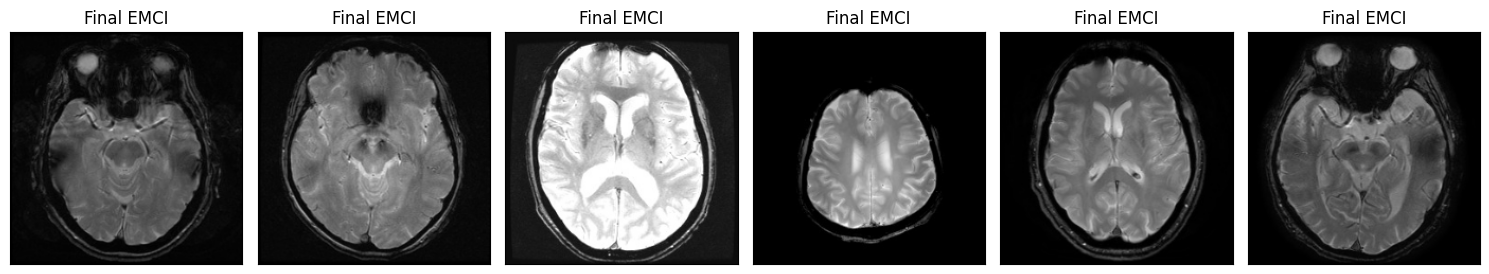

In [9]:
fig, axes = plt.subplots(nrows = 1, ncols = 6, figsize = (15, 10), subplot_kw = {'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    img = cv2.imread(final_emci_train_images[i])
    img = cv2.resize(img, (220, 220))
    ax.imshow(img)
    ax.set_title("Final EMCI")
fig.tight_layout()    

plt.show()

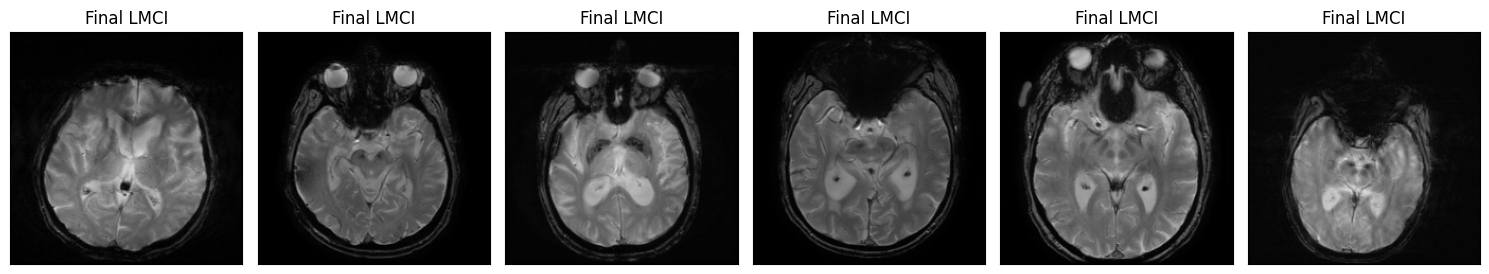

In [10]:

fig, axes = plt.subplots(nrows = 1, ncols = 6, figsize = (15, 10), subplot_kw = {'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    img = cv2.imread(final_lmci_train_images[i])
    img = cv2.resize(img, (220, 220))
    ax.imshow(img)
    ax.set_title("Final LMCI")
fig.tight_layout()    

plt.show()

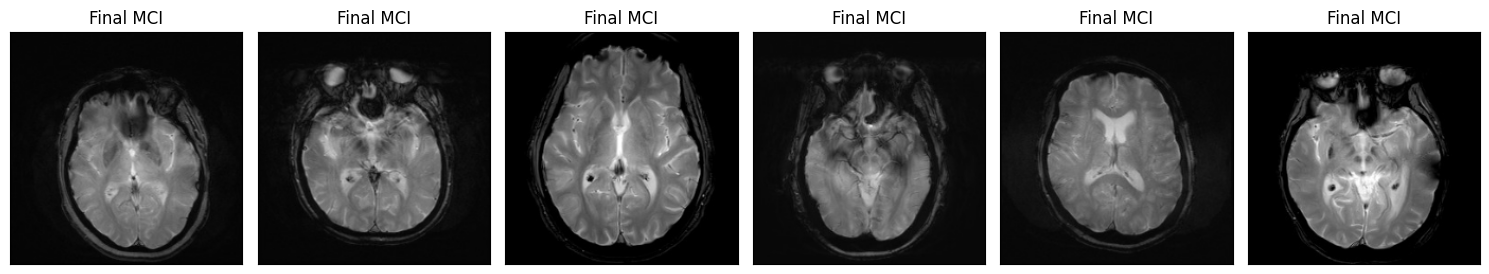

In [11]:
fig, axes = plt.subplots(nrows = 1, ncols = 6, figsize = (15, 10), subplot_kw = {'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    img = cv2.imread(final_mci_train_images[i])
    img = cv2.resize(img, (220, 220))
    ax.imshow(img)
    ax.set_title("Final MCI")
fig.tight_layout()    

plt.show()

In [12]:
# image_generator = ImageDataGenerator(rescale=1/255, validation_split=0.2) #shear_range =.25, zoom_range =.2, horizontal_flip = True, rotation_range=20)     


# train_dataset = image_generator.flow_from_directory(batch_size=8,
#                                                  directory='/content/gdrive/MyDrive/Aruna Gawde Maam Research Paper/Alzheimers-ADNI/train',
#                                                  shuffle=True,
#                                                  target_size=(176,208), 
#                                                  subset="training",
#                                                  class_mode='categorical')

# validation_dataset = image_generator.flow_from_directory(batch_size=8,
#                                                  directory='/content/gdrive/MyDrive/Aruna Gawde Maam Research Paper/Alzheimers-ADNI/train',
#                                                  shuffle=True,
#                                                  target_size=(176,208), 
#                                                  subset="validation",
#                                                  class_mode='categorical')

# image_generator_submission = ImageDataGenerator(rescale=1/255) 
# submission = image_generator_submission.flow_from_directory(
#                                                  directory='/content/gdrive/MyDrive/Aruna Gawde Maam Research Paper/Alzheimers-ADNI/test',
#                                                  shuffle=False,
#                                                  target_size=(176,208), 
#                                                  class_mode=None)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)


In [13]:
train_generator = train_datagen.flow_from_directory(
    '/content/gdrive/MyDrive/Aruna Gawde Maam Research Paper/Alzheimers-ADNI/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

train_samples = train_generator.samples
validation_split = 0.2
validation_samples = int(train_samples * validation_split)

Found 1101 images belonging to 5 classes.


In [14]:
train_generator = train_datagen.flow_from_directory(
    '/content/gdrive/MyDrive/Aruna Gawde Maam Research Paper/Alzheimers-ADNI/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training')


Found 1101 images belonging to 5 classes.


In [15]:
validation_generator = train_datagen.flow_from_directory(
    '/content/gdrive/MyDrive/Aruna Gawde Maam Research Paper/Alzheimers-ADNI/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

Found 0 images belonging to 5 classes.


In [16]:
test_generator = test_datagen.flow_from_directory(
    '/content/gdrive/MyDrive/Aruna Gawde Maam Research Paper/Alzheimers-ADNI/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

Found 195 images belonging to 5 classes.


/usr/local/lib/python3.9/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


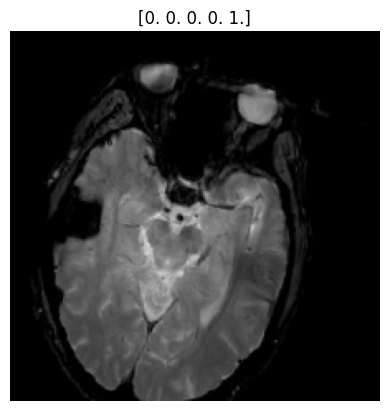

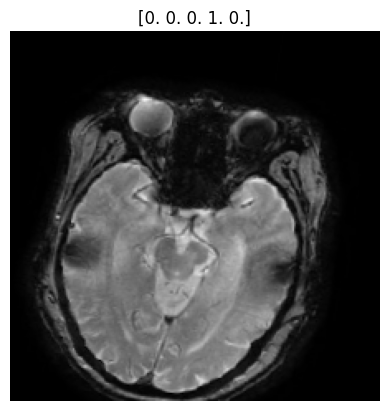

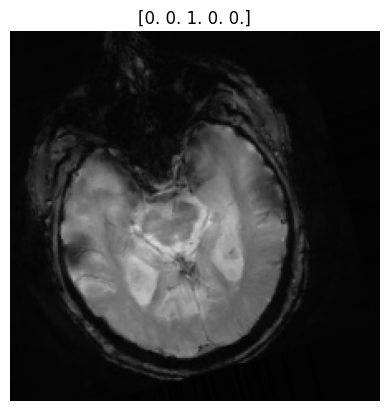

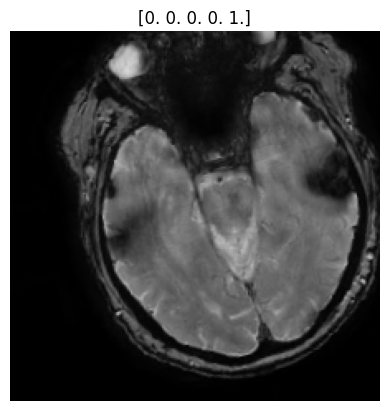

In [17]:
batch_1_img = train_generator[0]
for i in range(0,4):
    img = batch_1_img[0][i]
    lab = batch_1_img[1][i]
    plt.imshow(img)
    plt.title(lab)
    plt.axis('off')
    plt.show()


In [18]:
import pandas as pd 
import numpy as np 
import os
import cv2
import matplotlib.pyplot as plt
import warnings

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image, image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow import keras
import tensorflow 


In [19]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os


import copy
import warnings
warnings.filterwarnings('ignore')

import cv2
import keras
from keras.preprocessing.image import ImageDataGenerator

import matplotlib
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns
#import shap
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from keras.utils import load_img,img_to_array


from sklearn.model_selection import train_test_split

In [20]:
W = 224
H = 224
#168

label_to_class = {
    'Final AD JPEG': 0,
    'Final CN JPEG': 1,
    'Final EMCI JPEG': 2,
    'Final LMCI JPEG':3,
    'Final MCI JPEG':4
}
class_to_label = {v: k for k, v in label_to_class.items()}
n_classes = len(label_to_class)

def get_images(dir_name='/content/gdrive/MyDrive/Aruna Gawde Maam Research Paper/Alzheimers-ADNI', label_to_class=label_to_class):
    """read images / labels from directory"""
    
    Images = []
    Classes = []
    
    for j in ['/train','/test']:
        for label_name in os.listdir(dir_name+str(j)):
            cls = label_to_class[label_name]

            for img_name in os.listdir('/'.join([dir_name+str(j), label_name])):
                img = load_img('/'.join([dir_name+str(j), label_name, img_name]), target_size=(W, H))
                img = img_to_array(img)

                Images.append(img)
                Classes.append(cls)
            
    Images = np.array(Images, dtype=np.float32)
    Classes = np.array(Classes, dtype=np.float32)
    Images, Classes = shuffle(Images, Classes, random_state=0)
    
    return Images, Classes

In [22]:
Images, Classes = get_images()

Images.shape, Classes.shape


((1296, 224, 224, 3), (1296,))

In [23]:
indices_train, indices_test = train_test_split(list(range(Images.shape[0])), train_size=0.8, test_size=0.2, shuffle=False)

x_train = Images[indices_train]
y_train = Classes[indices_train]
x_test = Images[indices_test]
y_test = Classes[indices_test]

x_train.shape, y_train.shape, x_test.shape, y_test.shape


((1036, 224, 224, 3), (1036,), (260, 224, 224, 3), (260,))

In [24]:
from keras.utils import np_utils
## to one-hot

y_train = keras.utils.np_utils.to_categorical(y_train, n_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, n_classes)

y_train.shape, y_test.shape

((1036, 5), (260, 5))

In [25]:
# hello

In [26]:
from keras.applications import MobileNet
from keras.applications.mobilenet import MobileNet,preprocess_input

datagen_train = ImageDataGenerator(
    preprocessing_function=preprocess_input, # image preprocessing function
    rotation_range=30,                       # randomly rotate images in the range
    width_shift_range=0.1,                   # randomly shift images horizontally
    height_shift_range=0.1,                  # randomly shift images vertically
    horizontal_flip=True,                    # randomly flip images horizontally
    vertical_flip=False,                     # randomly flip images vertically
)
datagen_test = ImageDataGenerator(
    preprocessing_function=preprocess_input, # image preprocessing function
)

In [27]:
from keras.layers import Flatten, Dense
import keras
# load model
model = keras.models.Sequential()

# # load model
MobilNet = MobileNet(include_top=False, input_shape=(W,H,3),pooling='avg')    
print(MobilNet.summary())
# # Freezing Layers

# for layer in MobilNet.layers:
#     layer.trainable=False
    
model.add(MobilNet)
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(n_classes,activation='softmax'))
model.summary()
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.MaxPooling2D((2, 2)),
#     tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.MaxPooling2D((2, 2)),
#     tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.MaxPooling2D((2, 2)),
#     tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.MaxPooling2D((2, 2)),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(512, activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(256, activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(5, activation='softmax')
# ])


17225924/17225924 [==============================] - 0s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32

In [28]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 1024)             3228864   
 nal)                                                            
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 512)               524800    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 5)                 165       
                                                        

In [29]:

from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


In [30]:
import tensorflow as tf


In [31]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc')
]

In [32]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=METRICS)
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2,min_lr=0.0001)
epochs = 100

history=model.fit(datagen_train.flow(x_train,y_train, batch_size=128,shuffle=True), epochs=epochs,validation_data=datagen_test.flow(x_test,y_test, batch_size=32,shuffle=True), callbacks=[rlrp] )


# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Train the model
# history=model.fit(datagen_train.flow(x_train,y_train, batch_size=32,shuffle=True), epochs=100,validation_data=datagen_test.flow(x_test,y_test, batch_size=32,shuffle=True), 
#                   callbacks=[rlrp])

Epoch 1/100
9/9 [==============================] - 44s 2s/step - loss: 1.6746 - accuracy: 0.7691 - precision: 0.3726 - recall: 0.2259 - auc: 0.6596 - val_loss: 1.7295 - val_accuracy: 0.7892 - val_precision: 0.4727 - val_recall: 0.4654 - val_auc: 0.7166 - lr: 0.0010
Epoch 2/100
9/9 [==============================] - 13s 1s/step - loss: 1.3494 - accuracy: 0.8112 - precision: 0.5662 - recall: 0.2394 - auc: 0.7543 - val_loss: 2.0121 - val_accuracy: 0.7869 - val_precision: 0.4626 - val_recall: 0.4038 - val_auc: 0.7229 - lr: 0.0010
Epoch 3/100
9/9 [==============================] - 14s 1s/step - loss: 1.2719 - accuracy: 0.8203 - precision: 0.6015 - recall: 0.3002 - auc: 0.7833 - val_loss: 2.2407 - val_accuracy: 0.6931 - val_precision: 0.2116 - val_recall: 0.1962 - val_auc: 0.6581 - lr: 0.0010
Epoch 4/100
9/9 [==============================] - 13s 1s/step - loss: 1.2720 - accuracy: 0.8181 - precision: 0.5679 - recall: 0.3793 - auc: 0.7953 - val_loss: 1.7905 - val_accuracy: 0.8177 - val_precis

9/9 [==============================] - 0s 42ms/step - loss: 4.2906 - accuracy: 0.6962 - precision: 0.2245 - recall: 0.2115 - auc: 0.5564
Accuracy of our model on test data :  69.61538195610046 %


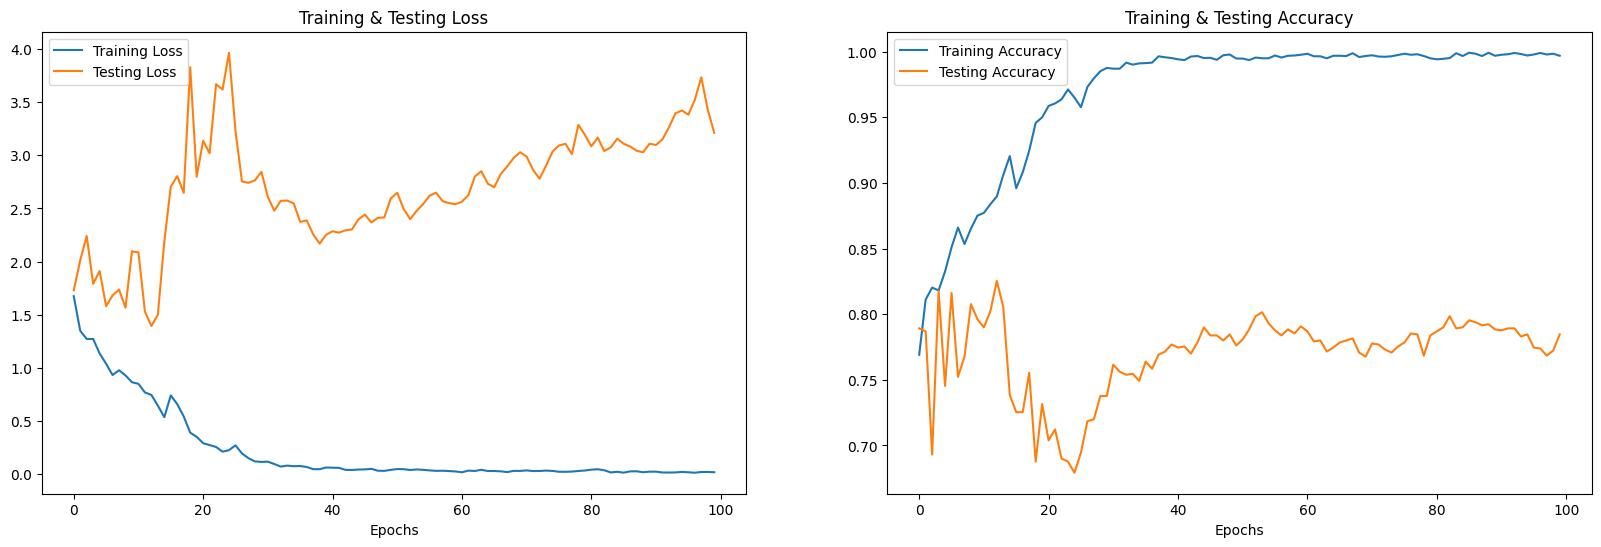

In [33]:

print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(100)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [34]:
pred_test = model.predict(x_test)
# y_pred = encoder.inverse_transform(pred_test)
# y_test = encoder.inverse_transform(y_test)

# Check for random predictions
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = pred_test.flatten()
df['Actual Labels'] = y_test.flatten()
df['Actual Labels'].value_counts()

9/9 [==============================] - 1s 34ms/step


0.0    1040
1.0     260
Name: Actual Labels, dtype: int64